In [13]:
# main.py
import argparse
import logging
from config_loader import load_config  # your existing config loader module
from data.dataset import ForecastDataset
from programs.pipeline import ForecastPipeline

import pandas as pd
import os
from visualization.exploration.behaviour import plot_raw_series, facet_consumption_profiles, plot_overlay_years, \
    plot_top_consumers, plot_missingness_heatmap


In [15]:
os.environ["ENV"] = "DEV"

In [17]:
databrick_task_id = 1

In [19]:
dataset = ForecastDataset(databrick_task_id)
dataset.load_data()
dataset.parse_identifiers()

C:\Users\molef\Playground\Data Science\Sherpa\Eskom\db\queries.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
INFO:data.dataset:✅ Loaded UFM config: ForecastConfig(forecast_method_id=1, forecast_method_name='ARIMA', model_parameters='(1,1,1)', region='EC', status='Failed', user_forecast_method_id=137, start_date=datetime.date(2025, 1, 1), end_date=datetime.date(2026, 12, 31), databrick_id=1)
INFO:root:📂 Loading dataset from dataset/DEV/PredictiveInputDataARIMA.csv
INFO:root:✅ Raw dataset loaded.
INFO:root:🔄 Converted 'CustomerID' to string.
INFO:root:🔄 Converted 'PodID' to string.
INFO:root:🔢 Data sorted by 'PodID' and 'ReportingMonth'.
INFO:root:✅ Raw dataset cleaned.
INFO:root:🧹 Data cleaned using 'clean_dataframe'.
INFO:data.dataset:✅ Data loaded and initial copy created.
INFO:data.dataset:🔍

(['GAUTENG', 'LIMLANGA', 'CENTRAL EAST', 'CAPE COASTAL', 'GEMMA'], [])

In [23]:
preprocessed_info = dataset.preprocess()

INFO:data.dataset:✅ Extracted metadata: {'forecast_method': 'ARIMA', 'parameters': '(1,1,1)', 'ufm_id': 137, 'start_date': datetime.date(2025, 1, 1), 'end_date': datetime.date(2026, 12, 31), 'databrick_id': 1}
INFO:root:Generated 255 column combinations.
INFO:root:🧮 Forecasting for 2
INFO:data.dataset:🔍 Customer IDs: []
INFO:data.dataset:🔍 Variable IDs: []
INFO:data.dataset:✅ Generated 255 column combinations.
INFO:data.dataset:✅ Unique Customers: ['7397925811', '7999245034']
INFO:data.dataset:✅ Unique Pods: ['3289712697', '3750837137', '7027193072', '736171562', '9849938574']


In [25]:
df = dataset.processed_df

In [33]:
df.head()

,PodID,CustomerID,TariffID,PeakConsumption,StandardConsumption,OffPeakConsumption,Block1Consumption,Block2Consumption,Block3Consumption,Block4Consumption,NonTOUConsumption
ReportingMonth,,,,,,,,,,,
2021-04-01,3289712697,7397925811,MEGAFLEX,153914.0,367188.0,558938.0,0.0,0.0,0.0,0.0,0.0
2021-05-01,3289712697,7397925811,MEGAFLEX,167168.0,430606.0,597782.0,0.0,0.0,0.0,0.0,0.0
2021-06-01,3289712697,7397925811,MEGAFLEX,180774.0,463500.0,580986.0,0.0,0.0,0.0,0.0,0.0
2021-07-01,3289712697,7397925811,MEGAFLEX,190552.0,504970.0,654482.0,0.0,0.0,0.0,0.0,0.0
2021-08-01,3289712697,7397925811,MEGAFLEX,181000.0,471316.0,658876.0,0.0,0.0,0.0,0.0,0.0


INFO:root:🎨 Visualizing raw time series for top customer: 7397925811


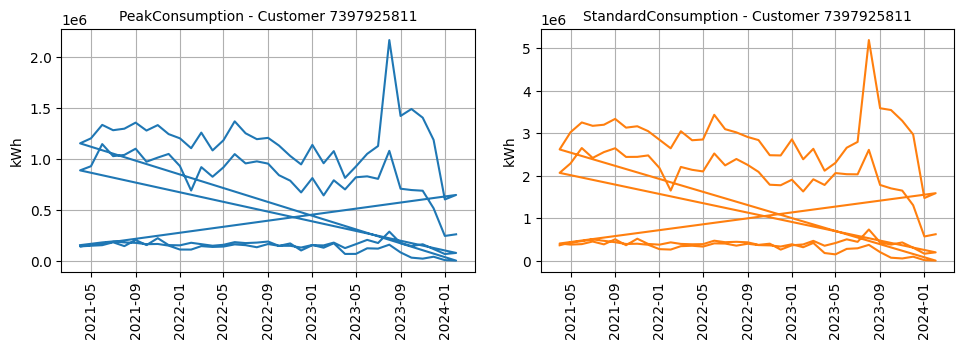

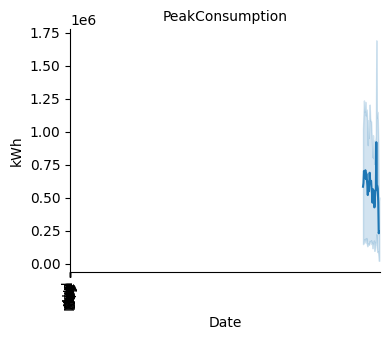

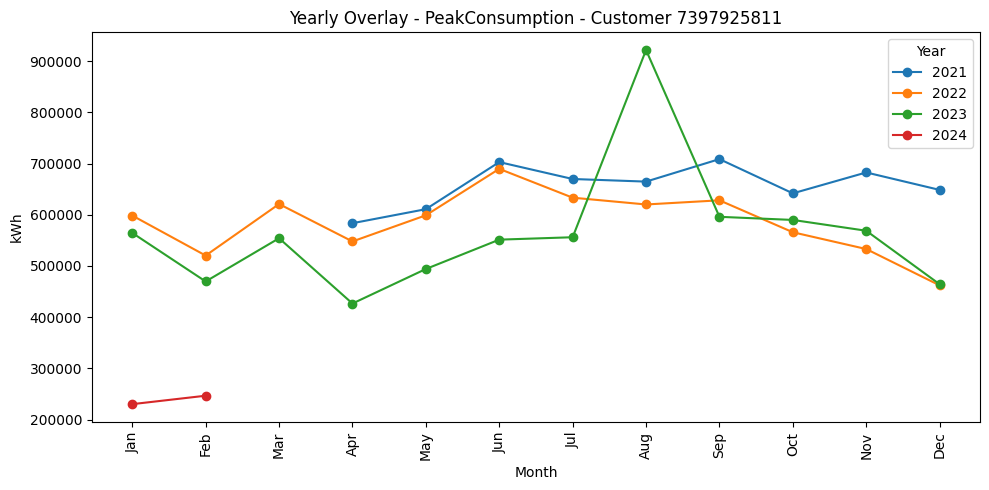

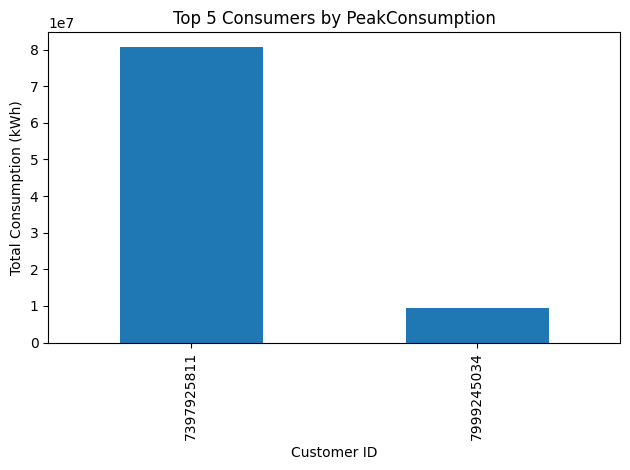

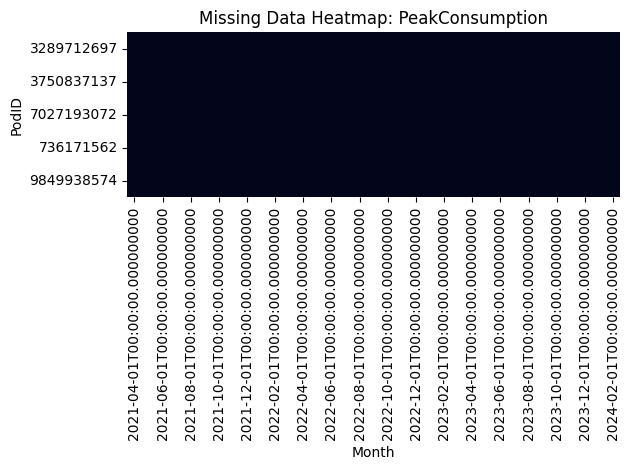

In [35]:
try:
    customer_id = df['CustomerID'].value_counts().idxmax()
    logging.info(f"🎨 Visualizing raw time series for top customer: {customer_id}")
    plot_raw_series(df, customer_id, columns=['PeakConsumption','StandardConsumption'])
    facet_consumption_profiles(df, customer_id, columns=['PeakConsumption'])
    plot_overlay_years(df, customer_id, columns=['PeakConsumption'])
    plot_top_consumers(df, columns=['PeakConsumption'], top_n=5)
    plot_missingness_heatmap(df)
except Exception as e:
    logging.warning(f"⚠️ Skipping visual diagnostics due to error: {e}")

In [ ]:
logging.info(f"Extracted Metadata: {preprocessed_info['metadata']}")

# Define forecast date range, assuming start_date/end_date come from the config.
dataset.define_forecast_range()

pipeline = ForecastPipeline(dataset=dataset,config=config)
model_performance, forecast_combined_df = pipeline.run()
logging.info("Forecasting result: %s", model_performance)